In [1]:
import pandas as pd
import numpy as np
import math
from math import factorial
import matplotlib.pyplot as plt
%matplotlib inline

### 1)
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [54]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [55]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [56]:
n = 10

In [57]:
b = (np.mean(x*y) - np.mean(x) * np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
b

2.620538882402765

In [58]:
# b = (n*((x*y).sum()) - (x.sum()*y.sum()))/(n*((x**2).sum())-((x.sum()**2)))
# b

In [59]:
a = np.mean(y)- b*np.mean(x)
a

444.1773573243596

In [60]:
y_hat = a + b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [61]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

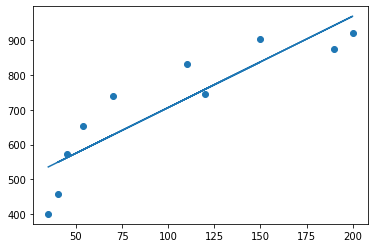

In [62]:
plt.scatter(x,y)
plt.plot(x,a+b*x)
plt.show;

In [63]:
mse = ((y - y_hat)**2).sum()/n
mse

6470.414201176658

In [64]:
x = x.reshape(10,1)

In [65]:
y = y.reshape(10,1)

In [66]:
#x = np.hstack([np.ones((10,1)),x])

In [67]:
B = np.dot(np.linalg.inv(np.dot(x.T,x)),x.T @y)
B

array([[5.88982042]])

### 2) 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [78]:
B1 = 0.1

In [79]:
mse = (1/n) * np.sum((B1*x-y)**2)
mse

518336.326

In [81]:
alpha = 1e-6

In [82]:
def mse_(B1,y=y,x=x,n=10):
    return np.sum((B1*x-y)**2)/2

In [83]:
mse_(5.890)

282584.2943

In [85]:
for i in range(1000):
    B1 -=alpha*(2/n)*np.sum((B1*x-y)*x)
    if i % 100==0:
        print('Iteration: {i},B1={B1}, mse={mse}'.format(i=i,B1=B1,mse=mse_(B1)))

Iteration: 0,B1=0.25952808, mse=2466188.6062734816
Iteration: 100,B1=5.54537842245223, mse=290756.59115855565
Iteration: 200,B1=5.868748638669329, mse=282614.8775064688
Iteration: 300,B1=5.888531320728348, mse=282584.406546801
Iteration: 400,B1=5.8897415574471985, mse=282584.29250700265
Iteration: 500,B1=5.889815595583751, mse=282584.29208020034
Iteration: 600,B1=5.889820124983314, mse=282584.2920786031
Iteration: 700,B1=5.889820402076462, mse=282584.29207859706
Iteration: 800,B1=5.88982041902807, mse=282584.292078597
Iteration: 900,B1=5.889820420065112, mse=282584.29207859706


### 3) 
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?


Таблица значений функции Лаплласа используется, когда требуется подсчитать значение функции распределения нормальной случайной величины в точке. Как правило, её приводят для функции распределения нормальной случайной величины с нулевым средним и единичной дисперсией.

 Распределение Стьюдента используется для точечного оценивания, построения доверительных интервалов и тестирования гипотез, касающихся неизвестного среднего статистической выборки из нормального распределения. Может быть использован для сопоставления средних у связных и несвязных выборок, причем выборки могут быть не равны по величине.

### 4) 
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [86]:
n = 10
B0 = 0.5
B1 = 0.1
alpha = 1e-5

In [87]:
def mse_(B0, B1,y=y,x=x,n=n):
    return np.sum((B0+B1*x-y)**2)/n

In [88]:
for i in range(3000000):
    y_pred = B0 + B1 * x
    B0 -= alpha * (2/n) * np.sum(y_pred - y)
    B1 -= alpha * (2/n) * np.sum((y_pred - y)* x)
    if i % 200000 == 0:
        print(f'Iteration: {i}, B0 ={B0},B1={B1}, mse={mse_(B0,B1)}')

Iteration: 0, B0 =0.5139852,B1=1.6942668000000003, mse=298468.9163337628
Iteration: 200000, B0 =283.34069750240894,B1=3.8043678086644137, mse=13032.327467049923
Iteration: 400000, B0 =385.8668639036556,B1=3.0497298945292055, mse=7332.903723490301
Iteration: 600000, B0 =423.0371916013903,B1=2.7761398487279845, mse=6583.778725509689
Iteration: 800000, B0 =436.51310033428416,B1=2.6769512024123863, mse=6485.3146898721825
Iteration: 1000000, B0 =441.3987208661758,B1=2.6409908752407456, mse=6472.372702433303
Iteration: 1200000, B0 =443.16997714690314,B1=2.6279536458972053, mse=6470.671624087454
Iteration: 1400000, B0 =443.81213688721203,B1=2.6232270662934023, mse=6470.448036516196
Iteration: 1600000, B0 =444.04494855685203,B1=2.6215134694729003, mse=6470.4186484505935
Iteration: 1800000, B0 =444.12935321524736,B1=2.6208922138696673, mse=6470.414785720677
Iteration: 2000000, B0 =444.1599536845888,B1=2.6206669808860696, mse=6470.41427800838
Iteration: 2200000, B0 =444.1710477253937,B1=2.620585